In [1]:
import numpy as np
import sep

In [45]:
# additional setup for reading the test image and displaying plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [46]:
# read image into standard 2-d numpy array
#using data given from Hubble deep feild
# data = fits.open("Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

hdulist = fits.open("Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
data = hdulist[0].data 


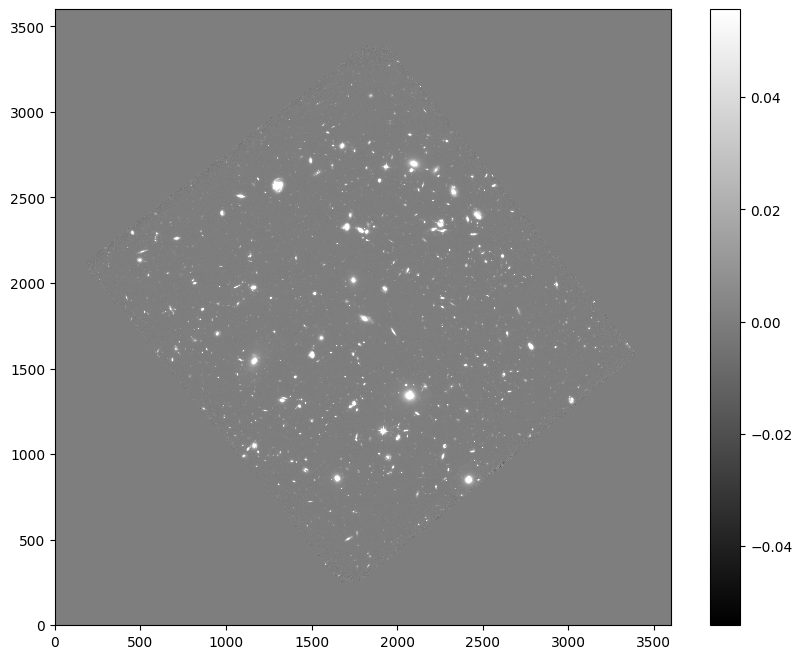

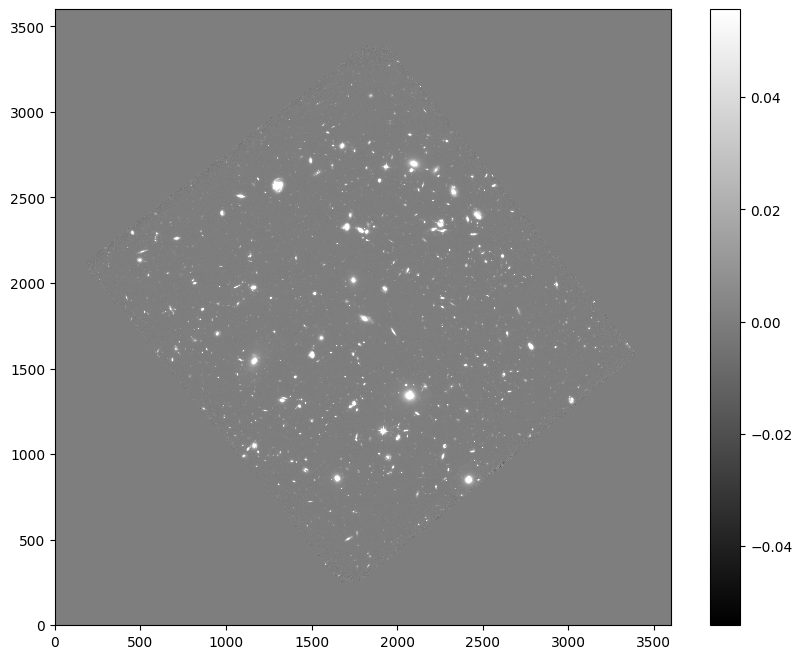

In [29]:
m, s = np.mean(data), np.std(data)

# Show the image
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.show()
plt.savefig('UDF f105w image.png')


In [30]:
hdulist.close()

In [47]:
# read image into standard 2-d numpy array
#using data given from Hubble deep feild
# data = fits.open(("Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"))

hdulist = fits.open("Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
data = hdulist[0].data 

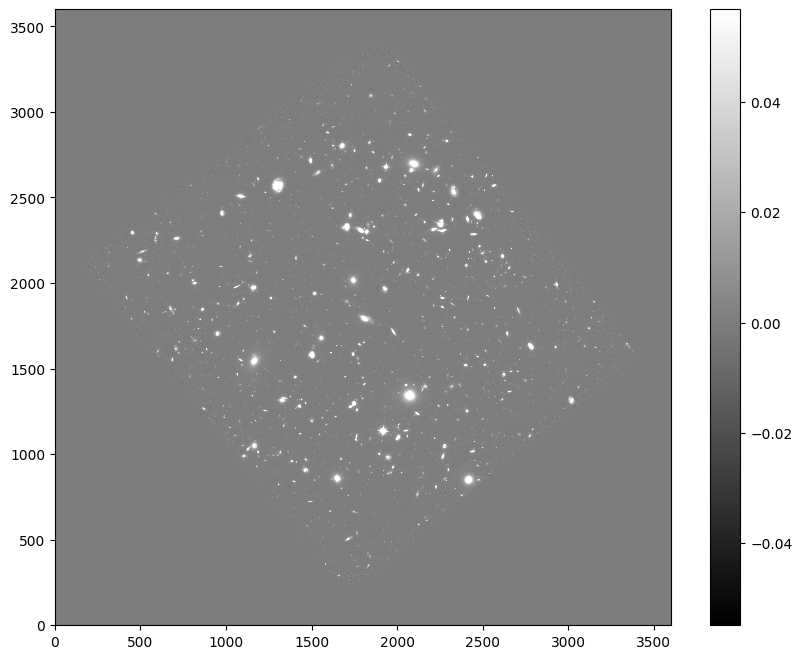

<Figure size 1000x800 with 0 Axes>

In [48]:
m, s = np.mean(data), np.std(data)

# Show the image
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.show()
plt.savefig('UDF f125w image.png')


In [ ]:
hdulist = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits ")
data = hdulist[0].data 

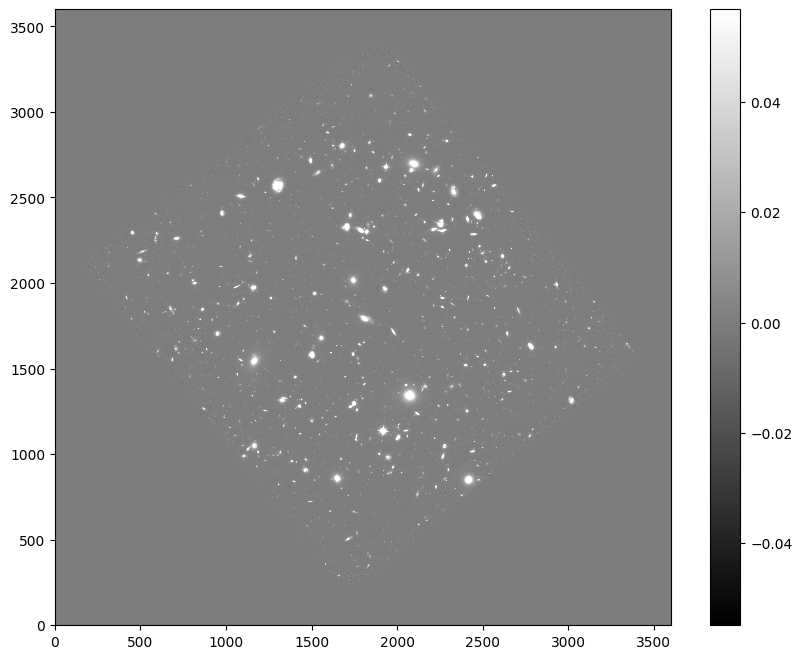

<Figure size 1000x800 with 0 Axes>

In [32]:
m, s = np.mean(data), np.std(data)

# Show the image
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.show()
plt.savefig('UDF f160w image.png')

In [ ]:
hdulist = fits.open("Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")
data = hdulist[0].data 

(array([[3600.,    0.,    0., ...,    0.,    0.,    0.],
        [3600.,    0.,    0., ...,    0.,    0.,    0.],
        [3600.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [3600.,    0.,    0., ...,    0.,    0.,    0.],
        [3600.,    0.,    0., ...,    0.,    0.,    0.],
        [3600.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([-1.01692863e-02,  7.01006079e+00,  1.40302906e+01,  2.10505199e+01,
         2.80707512e+01,  3.50909805e+01,  4.21112099e+01,  4.91314392e+01,
         5.61516724e+01,  6.31719017e+01,  7.01921310e+01]),
 <a list of 3600 BarContainer objects>)

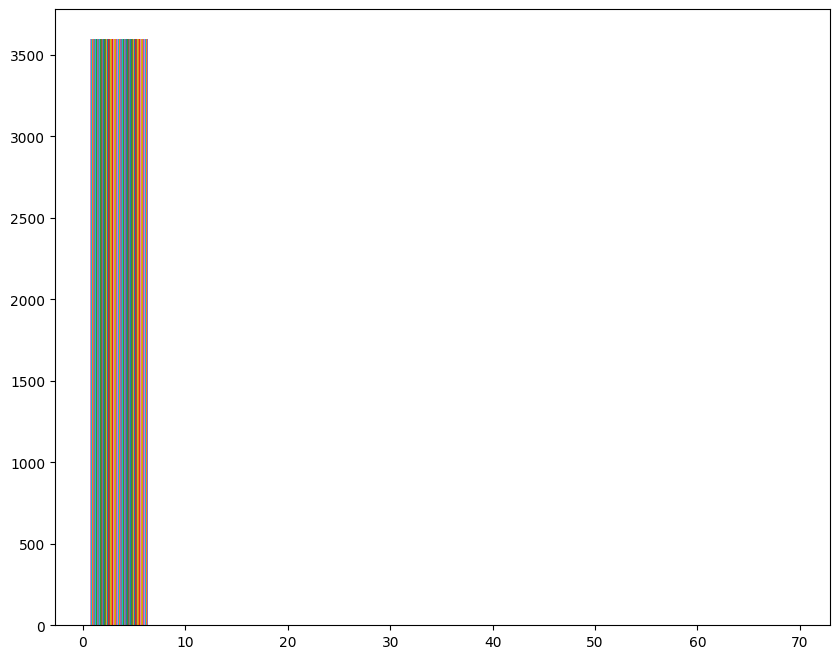

In [33]:
#histogram hubble feild data
plt.hist(data)

In [34]:
# measure a spatially varying background on the image
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [35]:
#fing median, mean, standard deviation
print(np.mean(data))
print(np.median(data))
print(np.std(data))

0.00095716957
0.0
0.055837348


In [36]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

In [37]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0007103732204996049


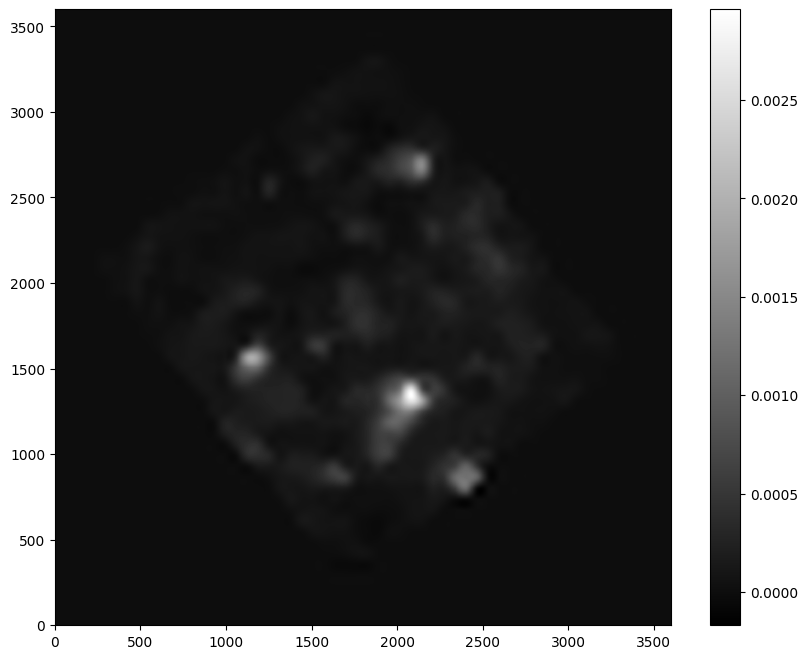

In [38]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('figure_2.png');

In [39]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

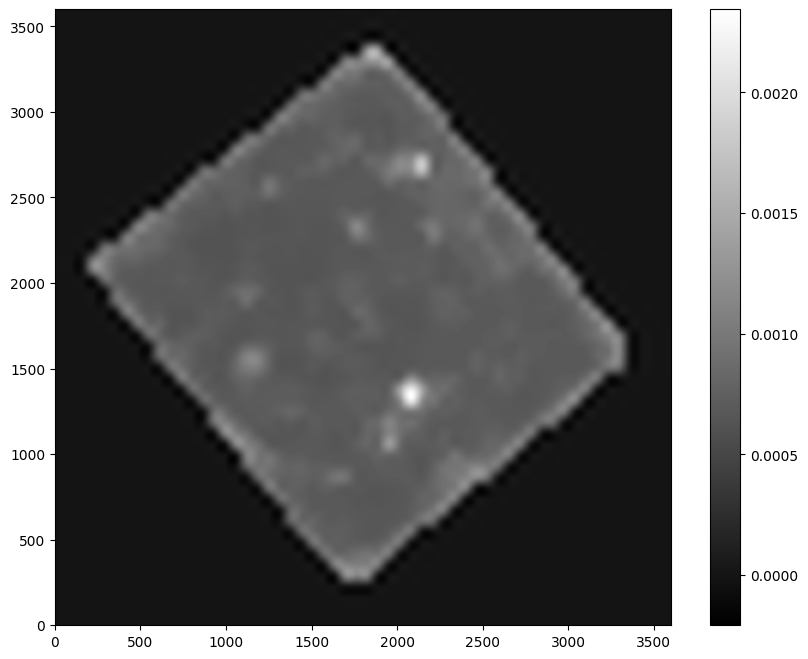

In [40]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('figure_3.png');

In [41]:
# subtract the background
data_sub = data - bkg

In [42]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [43]:
# how many objects were detected
len(objects)

7495

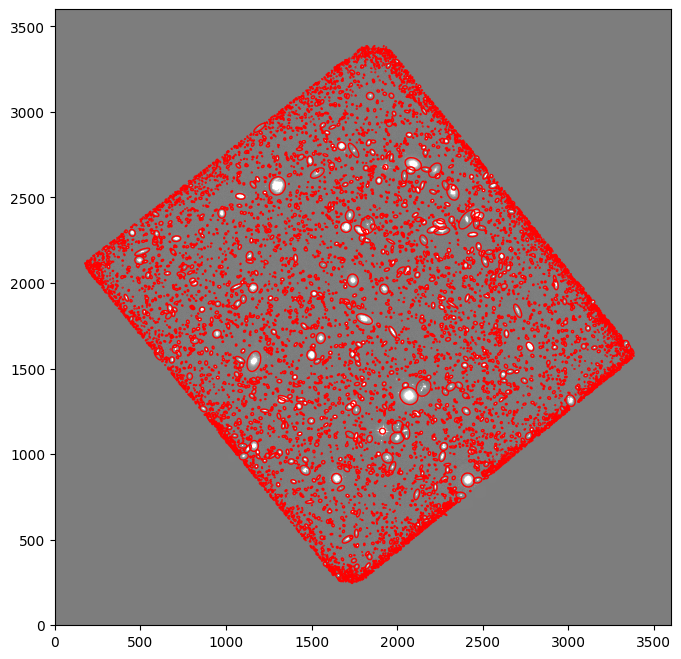

In [44]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')
plt.savefig('figure_4.png')
# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)